In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
367,14.37,95,106,0,256,53,Good,52,17,Yes,No
11,11.96,117,94,4,503,94,Good,50,13,Yes,Yes
90,5.33,115,22,0,491,103,Medium,64,11,No,No
360,8.77,118,86,7,265,114,Good,52,15,No,Yes
295,4.21,118,35,14,502,137,Medium,79,10,No,Yes
390,5.47,108,75,9,61,111,Medium,67,12,Yes,Yes
35,11.07,131,84,11,29,96,Medium,44,17,No,Yes
68,13.39,149,69,20,366,134,Good,60,13,Yes,Yes
354,5.30,133,31,1,80,145,Medium,42,18,Yes,Yes
123,8.19,127,103,0,125,155,Good,29,15,No,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


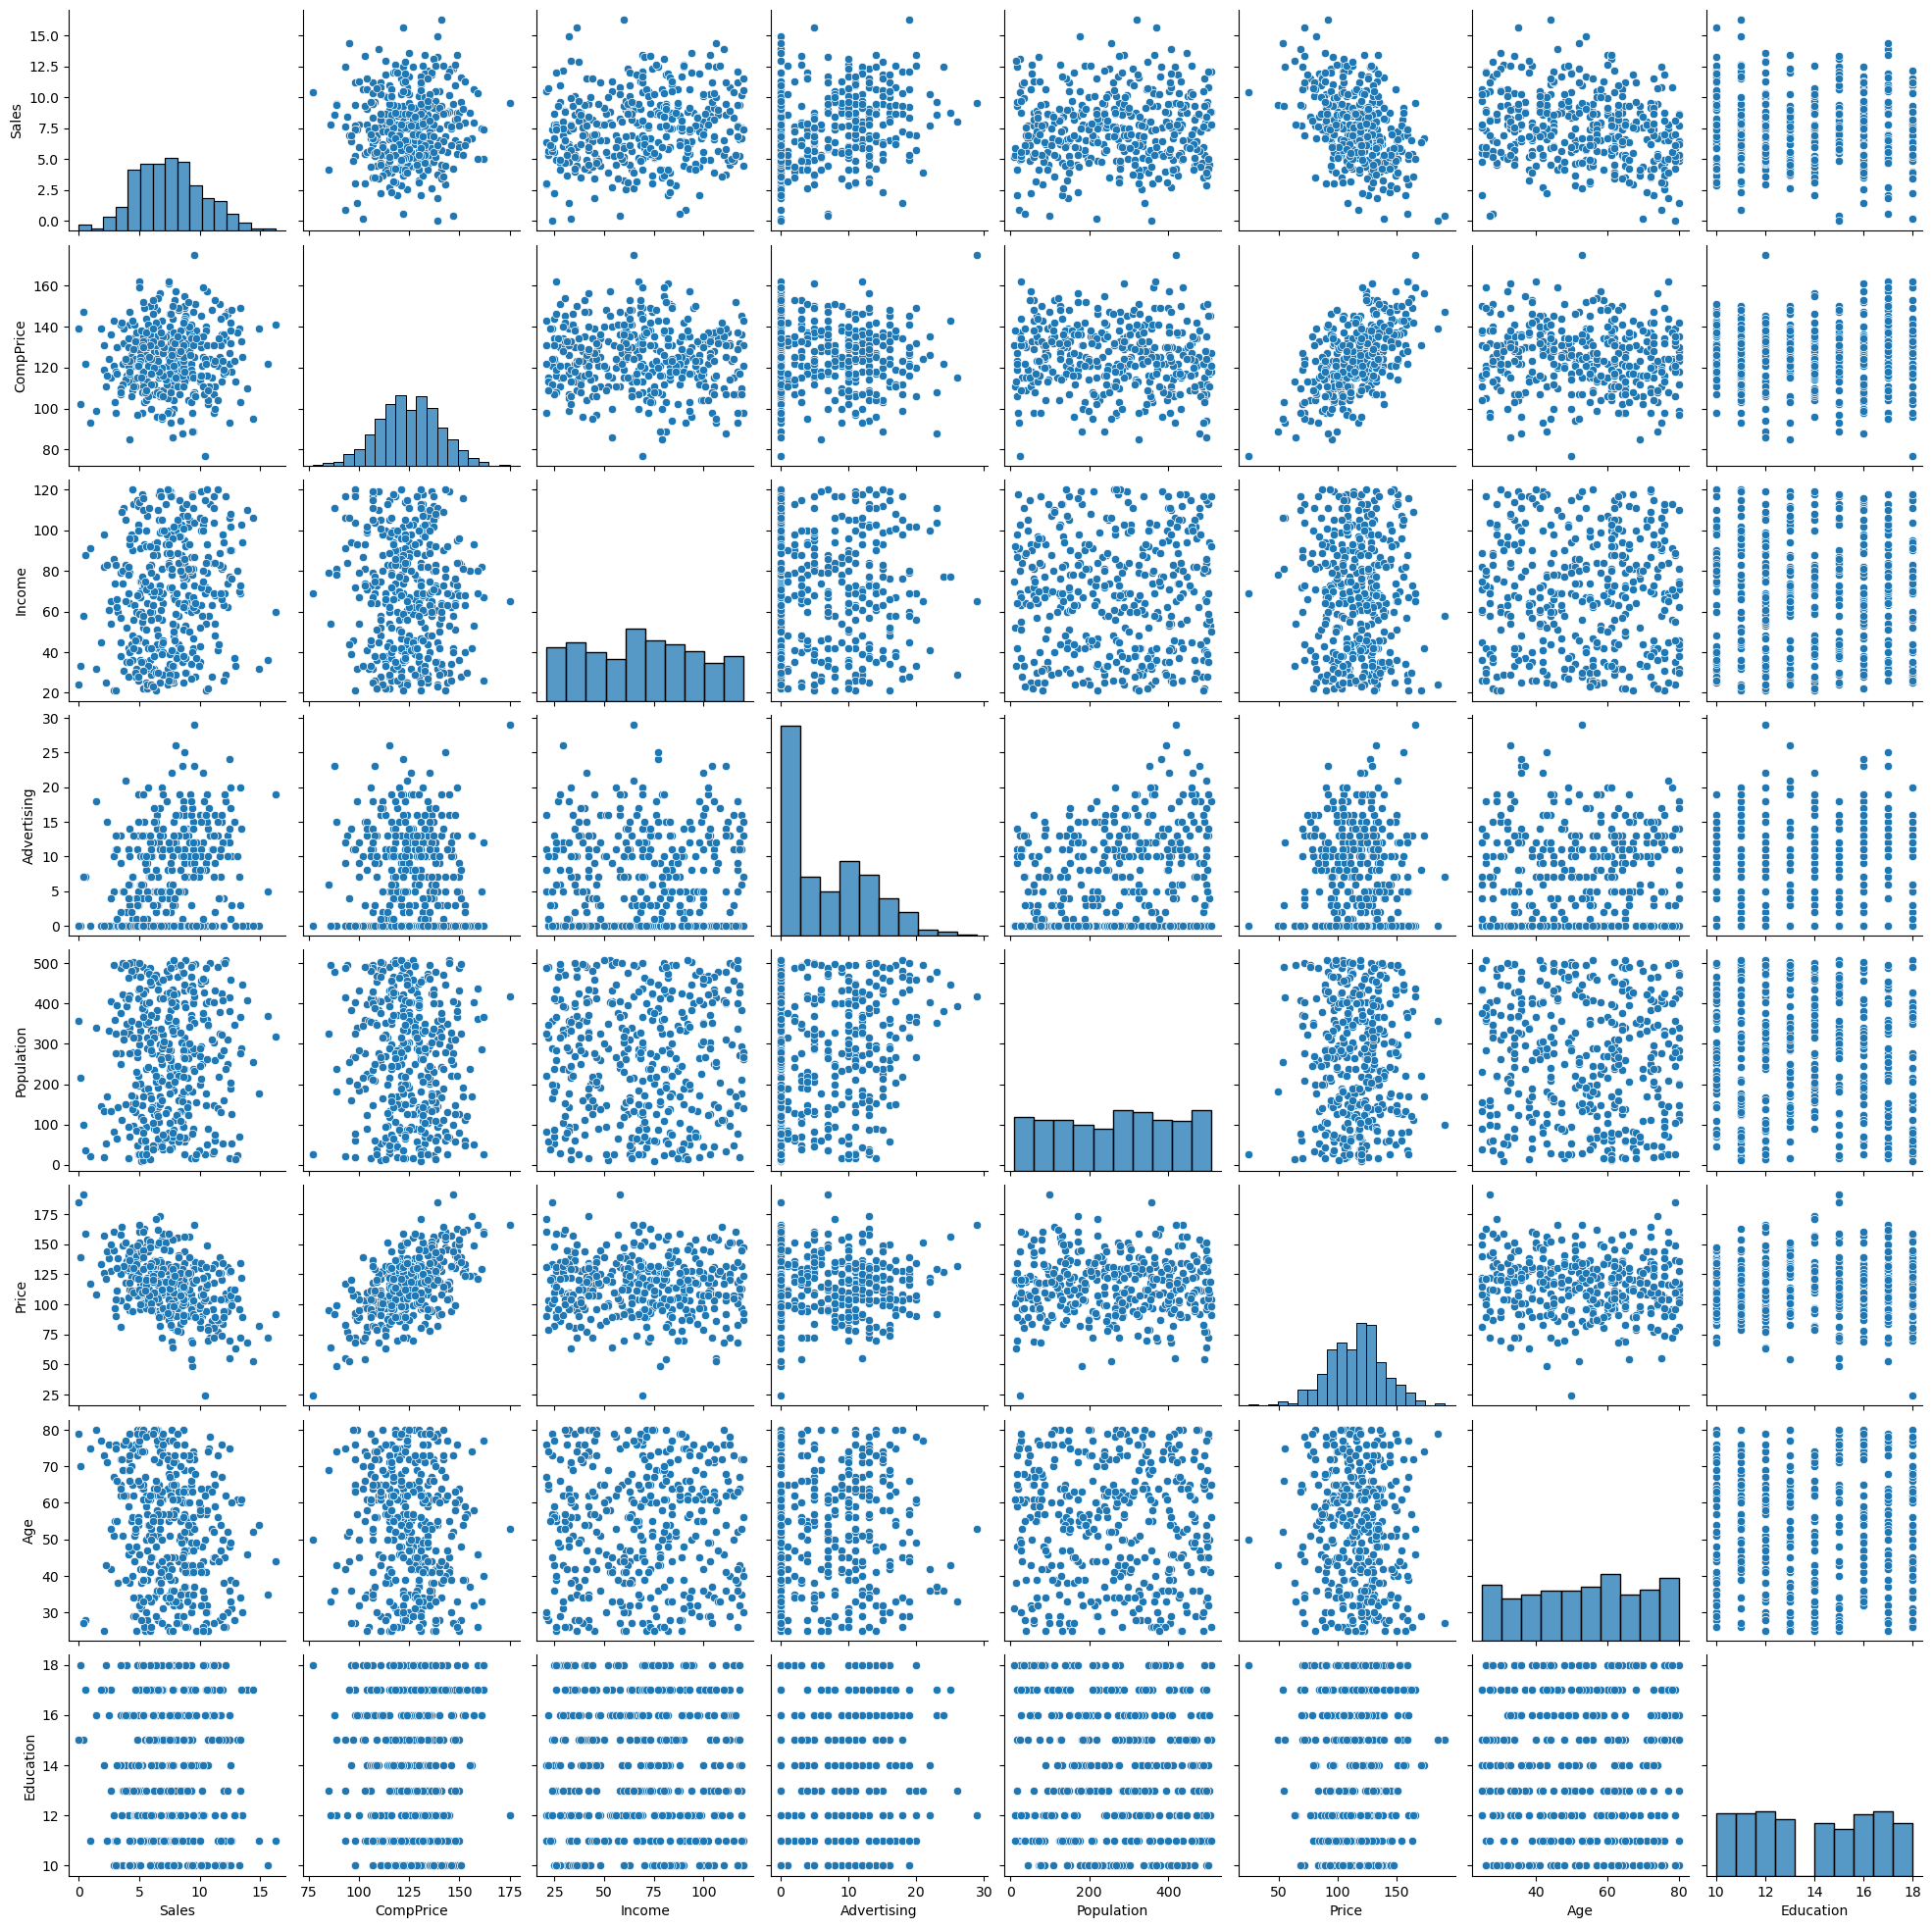

In [6]:
sns.pairplot(data)

In [7]:
    ### Correlation analysis  for data

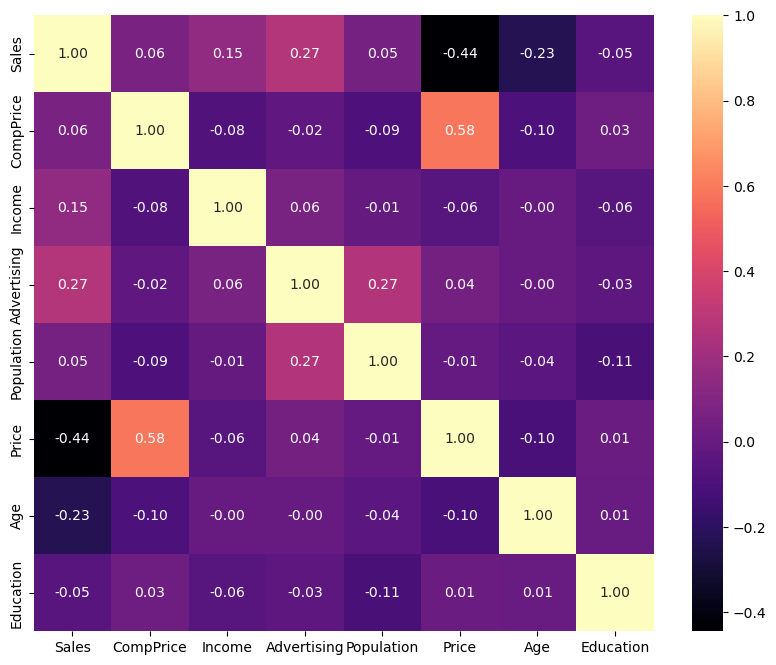

In [8]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.show()

In [9]:
#####   checking count of categories for categorical columns colums

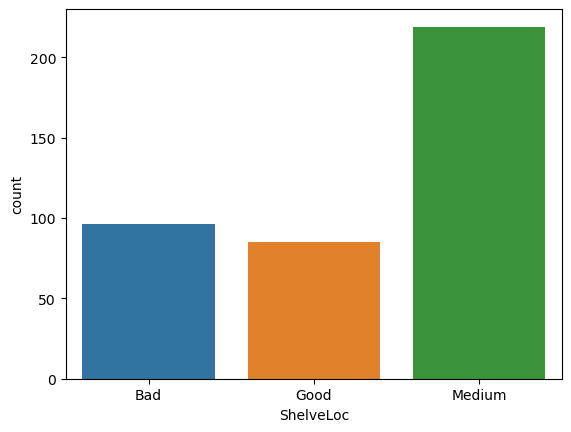

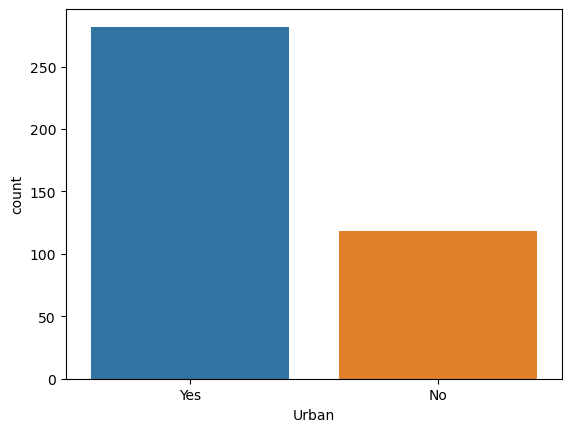

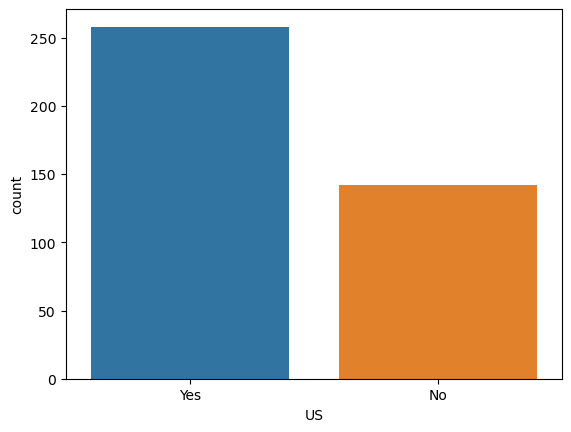

In [10]:
sns.countplot(data['ShelveLoc'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

sns.countplot(data['US'])
plt.show()

In [11]:
####  Converting Target variable 'Sales' into categories Low, Medium and High.

In [12]:
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

<AxesSubplot:xlabel='Sales', ylabel='count'>

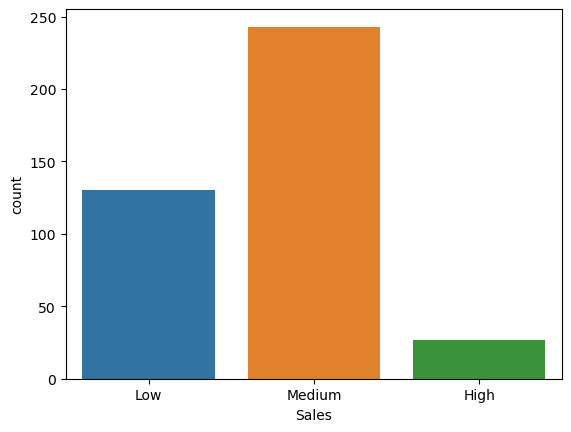

In [13]:
sns.countplot(data['Sales'])

In [14]:
data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [15]:
####  #encoding categorical data

In [16]:

label_encoder = preprocessing.LabelEncoder()

data['Sales'] = label_encoder.fit_transform(data['Sales'])
data['CompPrice'] = label_encoder.fit_transform(data['CompPrice'])
data['Income'] = label_encoder.fit_transform(data['Income'])
data['Advertising'] = label_encoder.fit_transform(data['Advertising'])
data['Population'] = label_encoder.fit_transform(data['Population'])
data['Price'] = label_encoder.fit_transform(data['Price'])
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Age'] = label_encoder.fit_transform(data['Age'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,49,51,11,141,54,0,17,7,1,1
1,2,22,27,16,129,18,1,40,0,1,1
2,2,24,14,10,138,15,2,34,2,1,1
3,2,28,77,4,249,31,2,30,4,1,1
4,1,52,42,3,178,62,0,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,49,85,17,104,62,1,8,4,1,1
396,2,50,2,3,17,54,2,30,1,0,1
397,2,71,5,12,195,91,2,15,8,1,1
398,1,12,57,7,145,29,0,25,2,1,1


In [17]:
## Dividing  into independent variables and dependent variable

In [18]:
X = data.drop('Sales', axis = 1)
y = data['Sales']

In [19]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49,51,11,141,54,0,17,7,1,1
1,22,27,16,129,18,1,40,0,1,1
2,24,14,10,138,15,2,34,2,1,1
3,28,77,4,249,31,2,30,4,1,1
4,52,42,3,178,62,0,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...
395,49,85,17,104,62,1,8,4,1,1
396,50,2,3,17,54,2,30,1,0,1
397,71,5,12,195,91,2,15,8,1,1
398,12,57,7,145,29,0,25,2,1,1


In [20]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [21]:
#### splitting the data into  training and testing  data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [23]:

x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,19,17,0,127,16,0,47,4,0,0
177,49,50,0,76,28,2,2,7,1,1
119,41,71,8,70,62,2,39,2,1,1
194,23,75,18,257,62,2,20,1,1,1
229,10,81,0,214,10,2,2,8,0,0
...,...,...,...,...,...,...,...,...,...,...
71,59,29,16,76,83,2,33,7,0,1
106,13,12,0,111,73,2,45,8,0,0
270,30,5,0,145,23,1,1,0,1,0
348,43,79,20,246,41,1,24,1,1,1


In [24]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
209,10,0,11,169,24,0,51,1,0,1
280,32,63,10,264,78,0,26,0,1,1
33,25,17,13,164,62,1,25,6,1,1
210,36,20,2,188,57,0,22,4,0,1
93,56,9,0,35,38,2,30,7,1,0
...,...,...,...,...,...,...,...,...,...,...
332,17,12,20,186,38,2,36,2,1,1
167,17,51,0,110,27,2,35,3,1,0
245,25,22,0,101,22,1,32,0,0,1
311,57,46,12,171,66,0,26,4,1,1


In [25]:
y_train

258    1
177    2
119    2
194    2
229    2
      ..
71     2
106    1
270    2
348    0
102    1
Name: Sales, Length: 268, dtype: int32

In [26]:
y_test

209    1
280    1
33     2
210    1
93     2
      ..
332    1
167    2
245    2
311    2
145    2
Name: Sales, Length: 132, dtype: int32

In [27]:
####  # building decision tree classifier using entropy criteria


In [28]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
## plotting decesion tree

<Figure size 7680x5760 with 0 Axes>

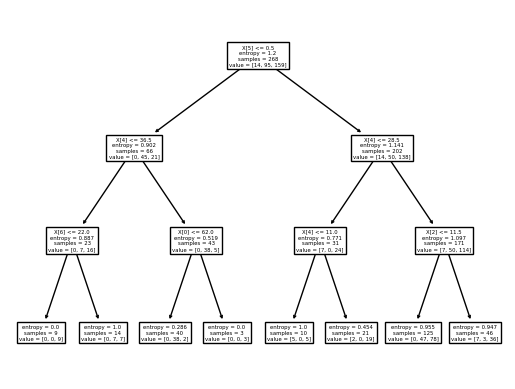

<Figure size 7680x5760 with 0 Axes>

In [30]:
tree.plot_tree(model_c5);
    plt.figure(dpi=1200)

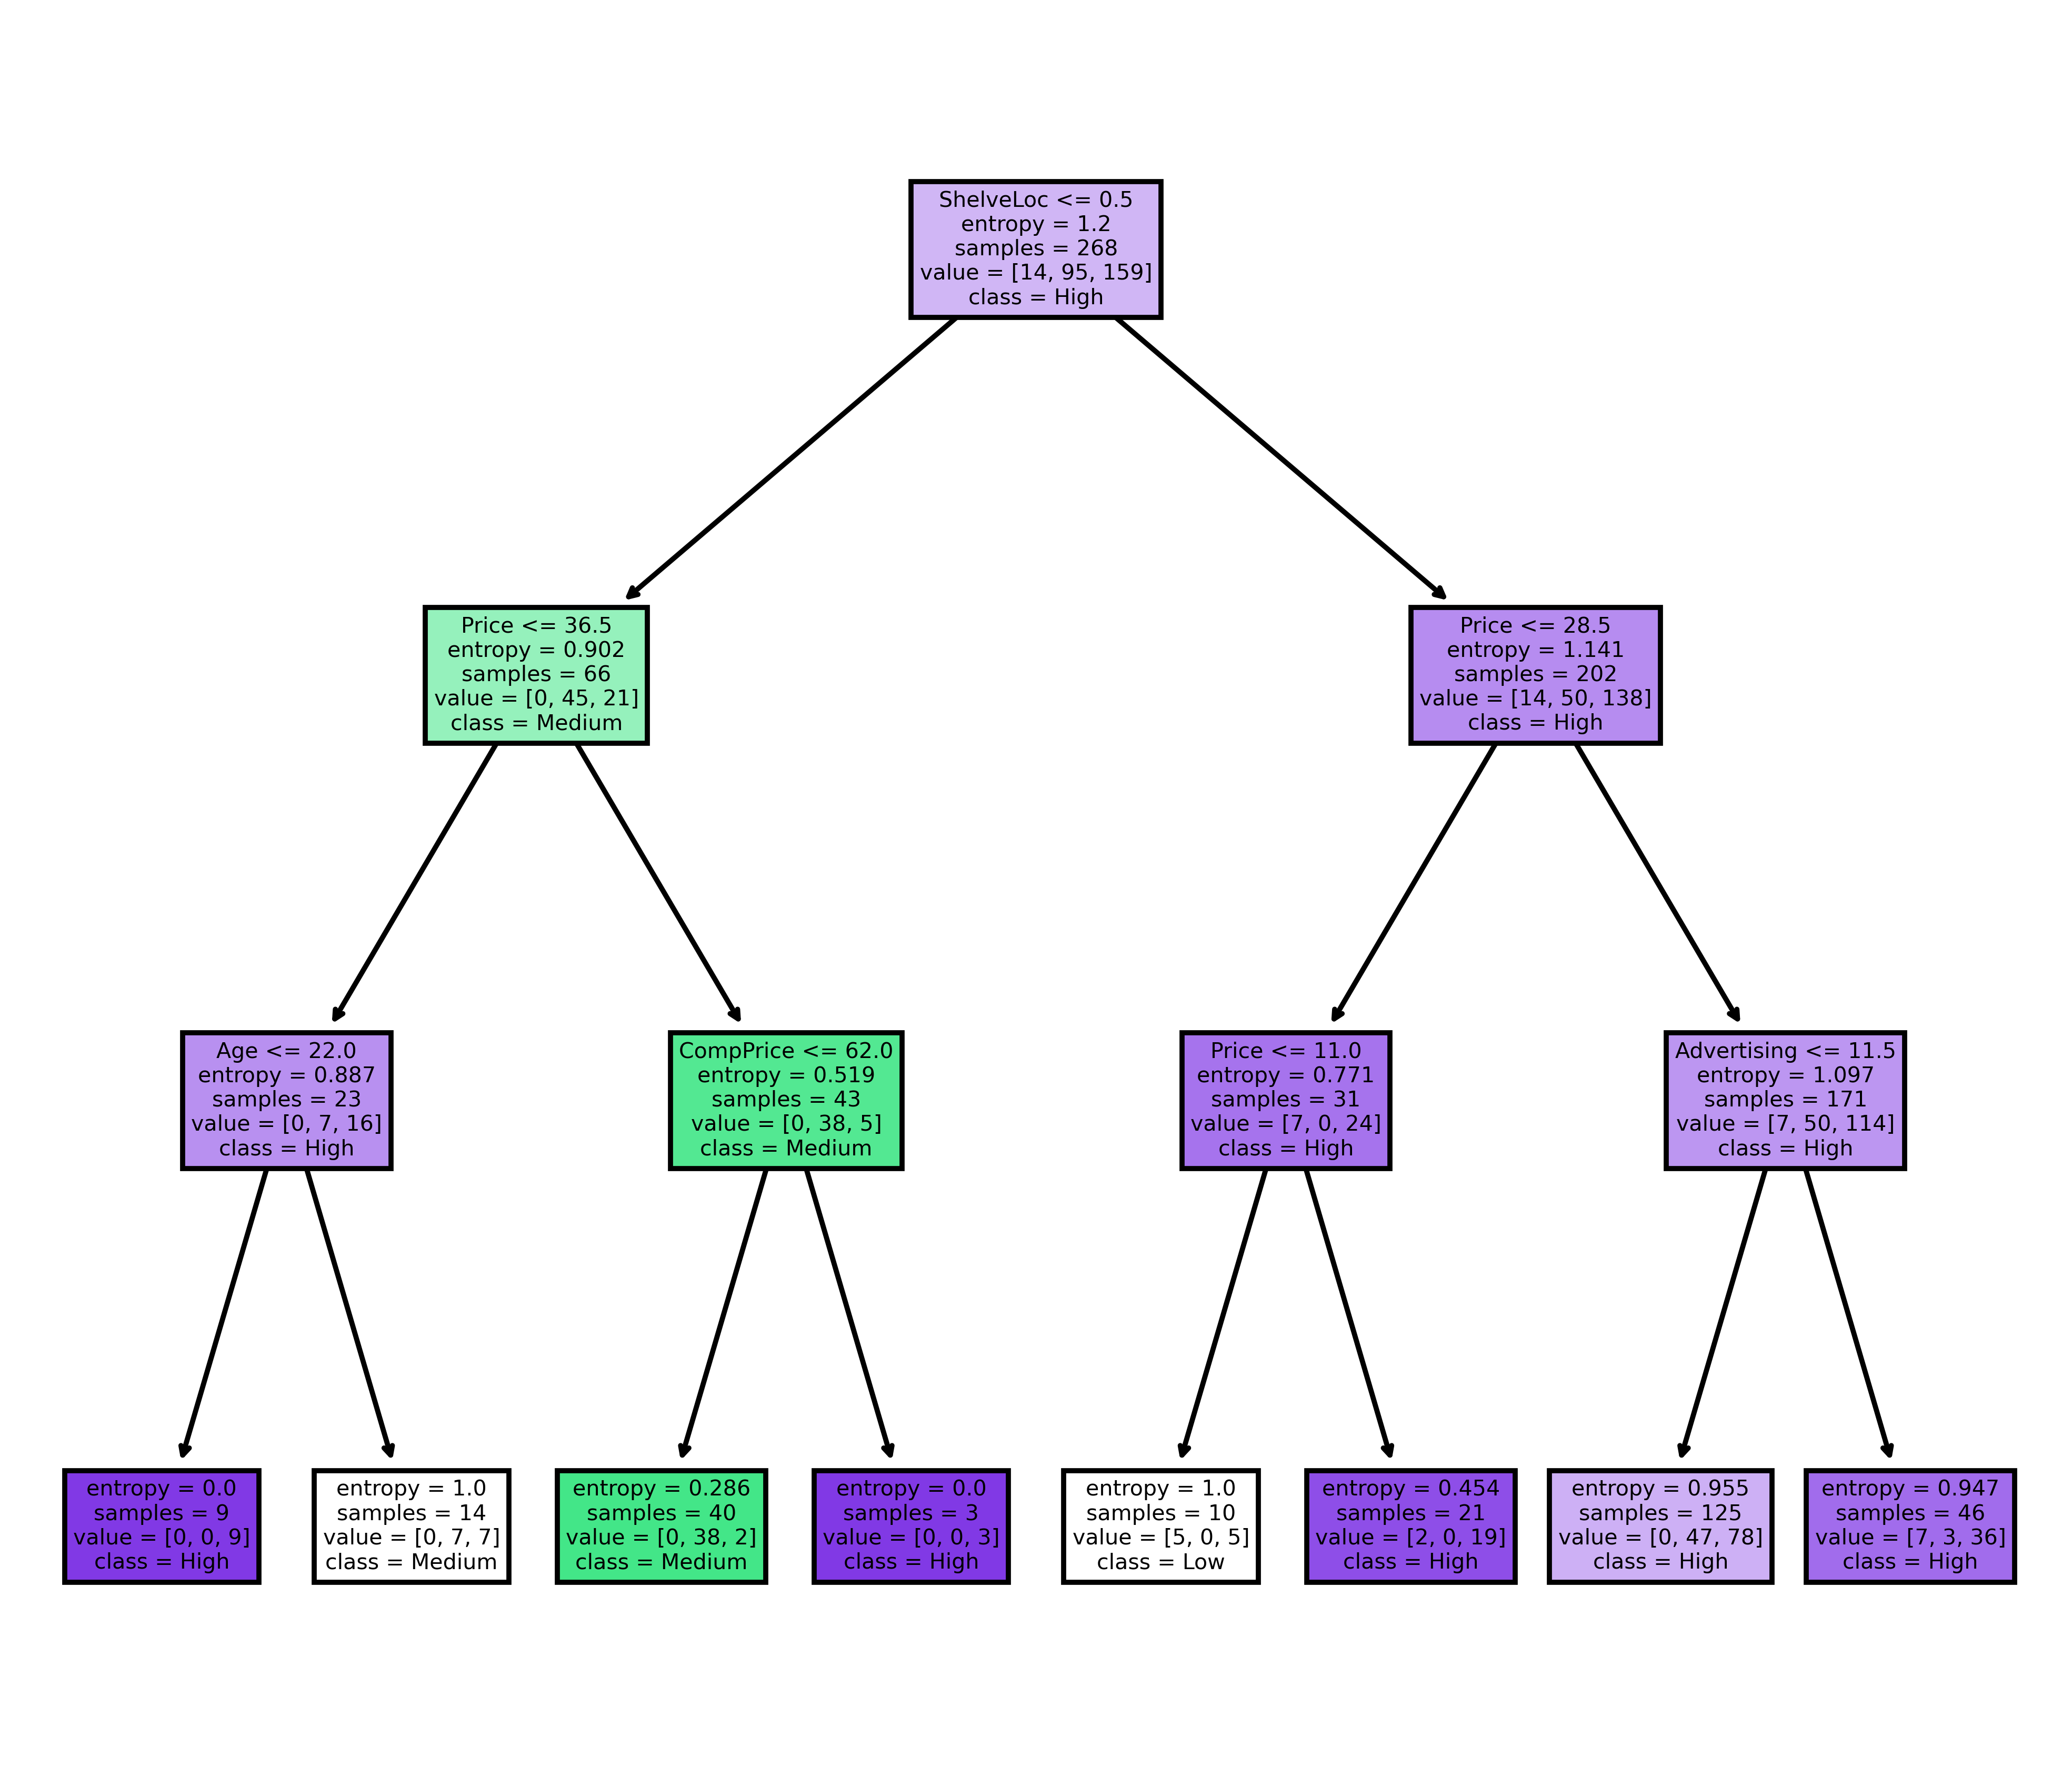

In [31]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,6), dpi=700)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [32]:
##### Predicting Data

In [33]:
preds = model_c5.predict(x_test)

In [34]:
preds

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [35]:
### creating cross table for checking model

In [36]:
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,2,0,11
1,0,15,20
2,3,11,70


In [37]:
### Accuracy for model

In [38]:
model_c5.score(x_test,y_test)

0.6590909090909091

In [39]:
### Building decision tree classifier (cart)using gini criteria

In [40]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
### plotting  Decesion tree

<Figure size 7680x5760 with 0 Axes>

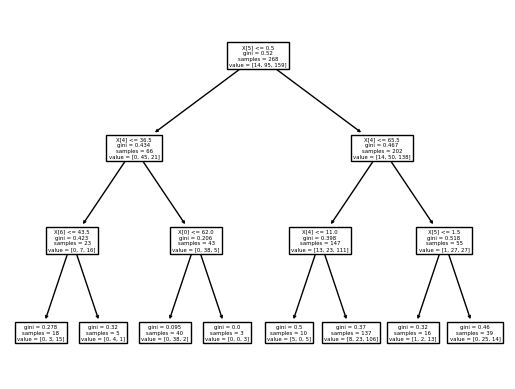

<Figure size 7680x5760 with 0 Axes>

In [42]:
tree.plot_tree(model_CART);
plt.figure(dpi=1200)


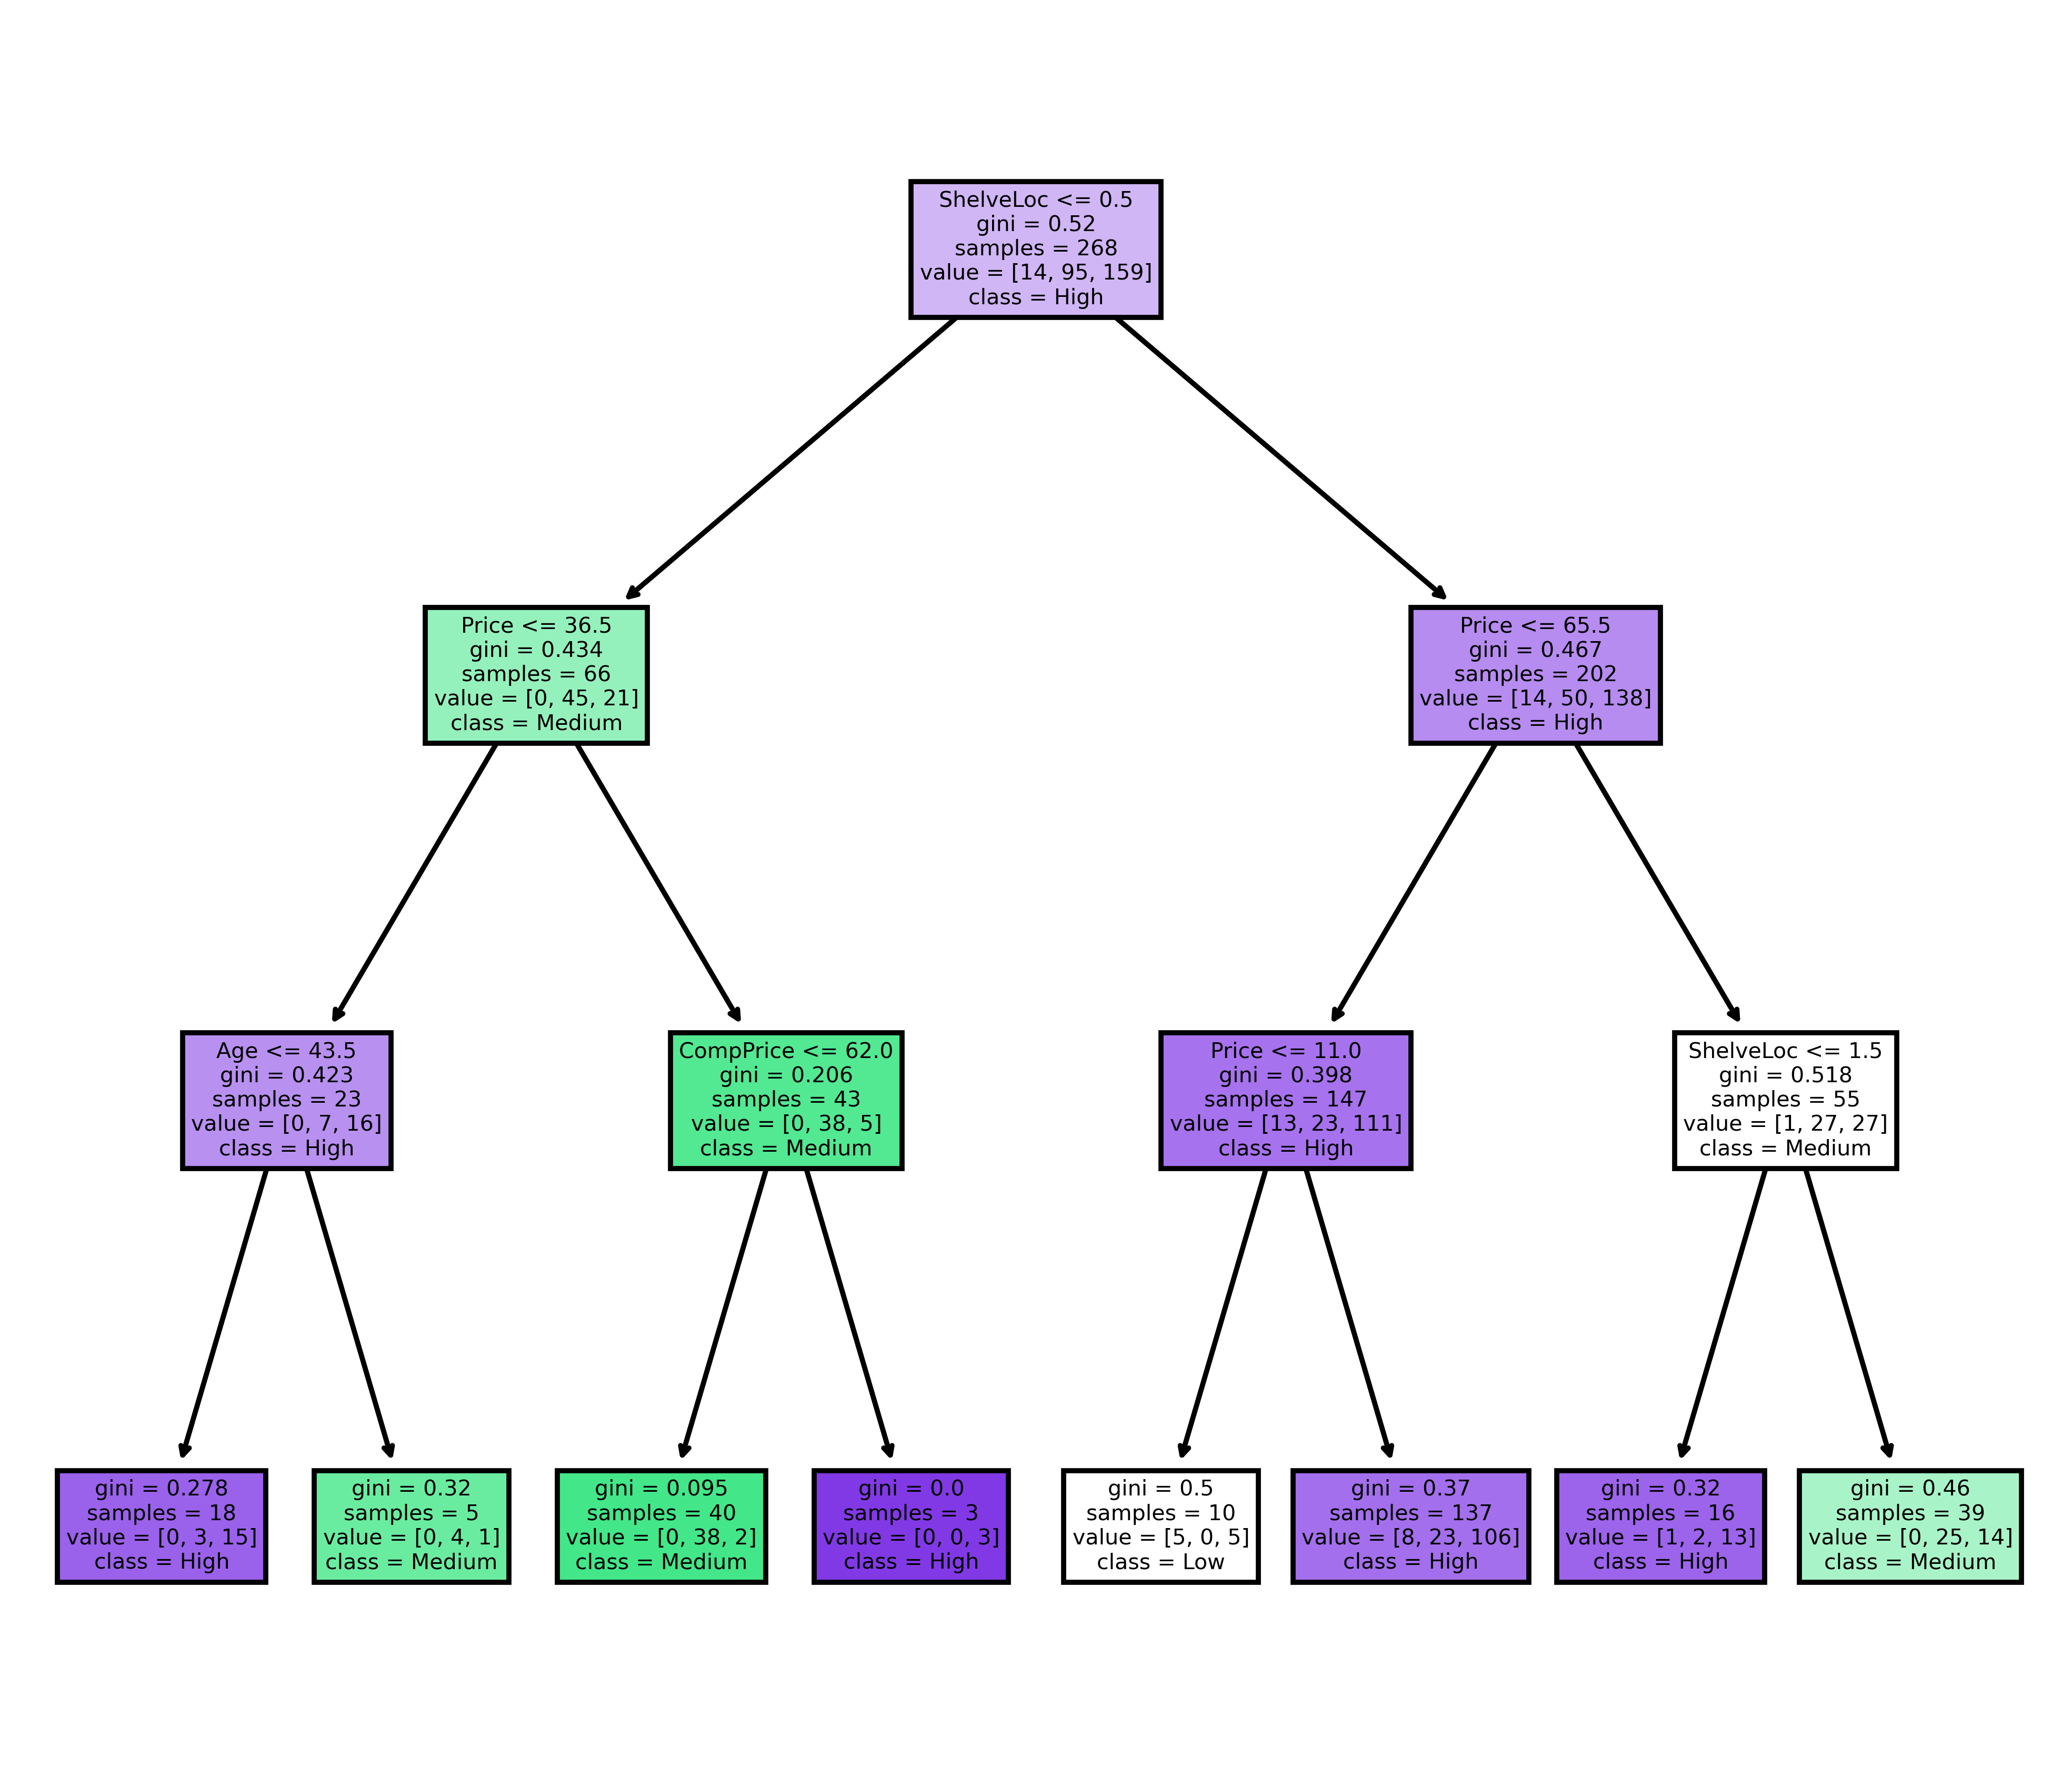

In [43]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,6), dpi=700)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [44]:
###  Predicting Data

In [45]:
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()


2    89
1    38
0     5
dtype: int64

In [46]:
preds

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [47]:
### creating cross tables  for checking data

In [48]:
 pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,2,0,11
1,0,23,12
2,3,15,66


In [49]:
## Accuracy for model

In [50]:
model_CART.score(x_test, y_test)

0.6893939393939394